In [1]:
import sys
import pandas as pd
from fuzzywuzzy import fuzz

In [12]:
df_sample = pd.read_csv('dample.csv')
print(len(df_sample))
df_addr_csv = df_sample[['EID','Address1','City','State','Zip Code']]
df_addr_csv = df_addr_csv[df_addr_csv['EID'].notna()]
df_addr_csv.sort_values(by=['EID'], inplace=True)
df_addr_csv = df_addr_csv.drop_duplicates()
#print(df_addr_csv)
raw_eid = df_addr_csv['EID'].dropna()
eid = raw_eid.tolist()
print(len(df_addr_csv))
print(len(eid))
#print(eid)

998
900
900


In [3]:
import cx_Oracle
connection = cx_Oracle.connect("vipapp/ZJf3__6qjRt8@exa1-scan.austin.utexas.edu:1525/viprp_pdb.austin.utexas.edu")
cursor = connection.cursor()
cursor.execute("select UT_EID, vi_addr_line1, vi_addr_line2, vi_city, vi_state,vi_zip from vi_vips_main m, vi_vips_addresses a  where m.ALUMNI_ID = a.ALUMNI_ID AND m.ut_eid IN %s" % str(tuple(eid)).replace(',)',')'))
df_addr_db = cursor.fetchall()
cursor.close()
connection.close()
#print(df_addr_db)
df_addr_db = pd.DataFrame(df_addr_db, columns = ['EID','Address1','Address2','City','State','Zip Code'])
#dropping duplicates
df_addr_db = df_addr_db.drop_duplicates()
df_addr_db = df_addr_db[df_addr_db['Address1'].notna()]
#df_addr_db['Address1'].notna()
#print(df_addr_db)

In [44]:
"""if the number of lines matching EID is more than 1, create a df to put those many rows, "rows" while rows >0 and 
 break the loop if the addr comparison for that loop yields token_set_ratio > 83
If zipcode differs, state or city or house inside same city might be different
If zipcode is same, compare address line 1 and line 2
if zipcode is not given, compare city or state before address comparison
df_addr
id_csv
addr_csv
addr_db
addr_diff
"""
'''
addr_diff = pd.DataFrame()
for i in range(len(df_addr_csv)):
#for i in (11,44,55,66):
    flag = 0
    id_csv = df_addr_csv.iloc[i,0]
    csv_addr = df_addr_csv.iloc[i,1]
    cmp_dbaddr = df_addr_db.loc[df_addr_db['EID'] == id_csv]
    #print(cmp_dbaddr)
    #print(df_addr_csv.loc[df_addr_csv['EID'] == id_csv])
    #print("---")
    
    for j in range(len(cmp_dbaddr)):
        db_addr = cmp_dbaddr.iloc[j,1]
        Token_Set_Ratio = fuzz.token_set_ratio(csv_addr,db_addr)
        if (Token_Set_Ratio > 77):
            flag = 0
            break
        else:
            flag = 1
    
    #print("flag = ", flag)
    
    if (flag == 1):
        addr_diff = addr_diff.append(df_addr_csv.loc[df_addr_csv['EID'] == id_csv], ignore_index=True)
        addr_diff = addr_diff.append(cmp_dbaddr)

print("----------------------------------------------------------------")
print(addr_diff)
print("----------------------------------------------------------------")
'''

'\naddr_diff = pd.DataFrame()\nfor i in range(len(df_addr_csv)):\n#for i in (11,44,55,66):\n    flag = 0\n    id_csv = df_addr_csv.iloc[i,0]\n    csv_addr = df_addr_csv.iloc[i,1]\n    cmp_dbaddr = df_addr_db.loc[df_addr_db[\'EID\'] == id_csv]\n    #print(cmp_dbaddr)\n    #print(df_addr_csv.loc[df_addr_csv[\'EID\'] == id_csv])\n    #print("---")\n    \n    for j in range(len(cmp_dbaddr)):\n        db_addr = cmp_dbaddr.iloc[j,1]\n        Token_Set_Ratio = fuzz.token_set_ratio(csv_addr,db_addr)\n        if (Token_Set_Ratio > 77):\n            flag = 0\n            break\n        else:\n            flag = 1\n    \n    #print("flag = ", flag)\n    \n    if (flag == 1):\n        addr_diff = addr_diff.append(df_addr_csv.loc[df_addr_csv[\'EID\'] == id_csv], ignore_index=True)\n        addr_diff = addr_diff.append(cmp_dbaddr)\n\nprint("----------------------------------------------------------------")\nprint(addr_diff)\nprint("----------------------------------------------------------------")\n

In [4]:
addr_diff = pd.DataFrame()
for i in range(len(df_addr_csv)):
#for i in (11,44,55,66,123,133,143,333,445,667,246,988):
    flag = 0
    id_csv = df_addr_csv.iloc[i,0]
    csv_addr = df_addr_csv.iloc[i,1]
    cmp_dbaddr = df_addr_db.loc[df_addr_db['EID'] == id_csv]
    #print(cmp_dbaddr)
    #print(df_addr_csv.loc[df_addr_csv['EID'] == id_csv])
    #print("---")
    
    for j in range(len(cmp_dbaddr)):
        db_addr = cmp_dbaddr.iloc[j,1]
        Token_Set_Ratio = fuzz.token_set_ratio(csv_addr,db_addr)
        if (Token_Set_Ratio > 77):
            flag = 0
            break
        else:
            flag = 1
    
    #print("flag = ", flag)
    
    if (flag == 1):
        addrlist = []
        for k in range(len(cmp_dbaddr)):
            temp = (cmp_dbaddr.loc[cmp_dbaddr['EID'] == id_csv]).iloc[:,1]
            addrlist = temp.values.tolist()
        addr_diff = addr_diff.append({'EID':id_csv, 'DB_Address':addrlist,'CSV_Address':csv_addr}, ignore_index=True)
print("----------------------------------------------------------------")
print(addr_diff)
print("----------------------------------------------------------------")

----------------------------------------------------------------
                  CSV_Address  \
0    11218 S. 276th East Ave.   
1                P.O. Box 100   
2                 PO Box 7972   
3          754 Milestone Park   
4                  PO Box 727   
..                        ...   
122           4330 Bull Creek   
123            238 Abiso Ave.   
124           2405 W. 9th St.   
125             2901 Oakhurst   
126        2975 Blackburn St.   

                                           DB_Address       EID  
0                            [28172 E 115th St South]  0234IBFD  
1       [516 Saint Paul Street, 440 Oak Creek Circle]  0254CMBM  
2                             [7208 Cut Plains Trail]  0282AANF  
3                                 [426 Barretta Loop]  0395VBPT  
4                              [470 Bryant Boulevard]  0429EYTY  
..                                                ...       ...  
122                           [4533 North Versailles]    TWH624  
123       

In [58]:
addr_diff.to_csv(r'C:\Users\le5752\Documents\DB_Python\addr.csv', index = False)

In [13]:
print(len(addr_diff))

127


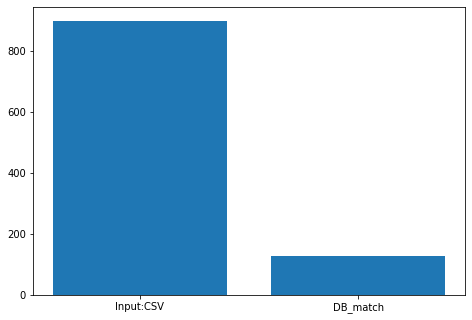

In [15]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['Input:CSV', 'DB_match']
students = [len(df_addr_csv),len(addr_diff)]
ax.bar(langs,students)
plt.show()